# CLASSIFICADOR AUTOMÁTICO DE IMAGENS

### Neste curso iremos trabalhar com um e-commerce, uma loja de roupas, e toda vez que subirmos uma imagem para a plataforma, teremos que escrever se ela é uma camiseta, bota, saia, ou seja, precisamos classificar esta imagem quando a colocamos no site. O que eles pediram foi que automatizássemos este processo, então, a partir do momento em que alguém coloca uma imagem nova no site, já tenhamos algo na máquina que entenda e classifique-a automaticamente.

In [1]:
#Instalando a biblioteca que possui as redes neurais
!pip install tensorflow

     ------------------------------------ 455.9/455.9 MB 665.6 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 6.3 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 8.2 MB/s eta 0:00:00
     ------------------------------------- 438.7/438.7 kB 13.4 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.50.0-cp39-cp39-win_amd64.whl (3.7 MB)
     -------------------------------------- 895.9/895.9 kB 7.1 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 7.6 MB/s eta 0:00:00
  Using cached te

In [2]:
#Importando o data set de dentro do Keras
import tensorflow
from tensorflow import keras
dataset = keras.datasets.fashion_mnist

In [3]:
# exibindo o dataset
dataset.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
# Carregando o dataset dentro das 2 tuplas
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [5]:
# verificando a extensão do dados, 60000 mil imagens para treino.
len(imagens_treino)

60000

In [6]:
# formato dos dados, temos um array de 28 linhas para 28 colunas
imagens_treino.shape

(60000, 28, 28)

In [7]:
# formato dos dados, temos um array de 28 linhas para 28 colunas e 10000 mil imagens para teste
imagens_teste.shape

(10000, 28, 28)

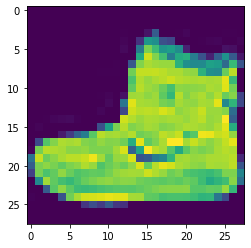

In [8]:
# visualizando as imagens através do matplotlib, temos uma imagens de 28x28 pixels
# cada pixel é categorizado por 0 ou 1, ou seja, linguagem de máquina
import matplotlib.pyplot as plt
plt.imshow(imagens_treino[0])

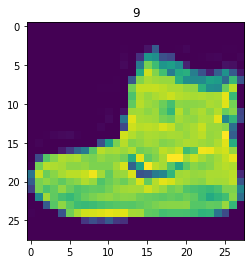

In [9]:
# na base de dados label, ou identificação, o algoritimo utiliza números e não palavras para classificar uma imagem
# temos um array com uma sequência de números para listar as imagens
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
identificacoes_treino.min()
identificacoes_treino.max()
total_de_classificacoes = 10

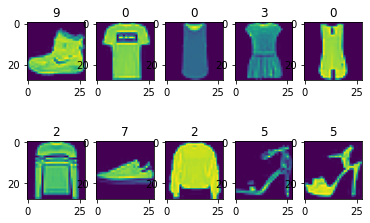

In [10]:
# realizando um  "FOR" para listar todas imagens categorizadas
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(identificacoes_treino[imagem])

In [11]:
# atribuindo nome para as classificações
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

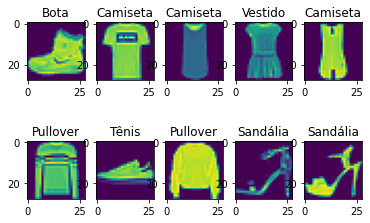

In [12]:
# plotando as imagens com nome
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

In [13]:
# o modelo possui três camadas em sequência, temos a entrada, o processamento e a saída
# instanciando a função
modelo = keras.Sequential([
    # sequenciando a entrada do modelo
    keras.layers.Flatten(input_shape=(28,28)),
    
    # criando uma camada com 256 funções que irão ser densas, completamente conectadas
    # tensorflow.nn.relu, função de redes neurais do tensorflow
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    
    # criando nossa base de saída.
    # o algoritimo vai comparar a imagem com as categorias e irá estipular a probalbilidade de acerto.
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

# compilando o modelo, dando forma antes de treinar
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy')

# treinando o modelo
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 15s 7ms/step - loss: 4.1365


In [14]:
# adicionando mais camadas no modelo.
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 23s 11ms/step - loss: 1.6876


In [15]:
# Treinando o modelo 5 vezes utiliando o epochs
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 1.5465
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4820
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4477
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4148
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3944


In [16]:
# temos os dados de perda, mas e a metrica de ganho? inserido a metrica accuracy
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

modelo.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 1.5937 - accuracy: 0.7722
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4888 - accuracy: 0.8278
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4368 - accuracy: 0.8429
Epoch 4/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.4029 - accuracy: 0.8549
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3871 - accuracy: 0.8606


## Após treinar o modelo, qual é o próximo passo?

### Iremos realizar a predição, testaremos o modelo. 
### Veremos como ele esta se adaptando a dados novos.

In [17]:
# utilizando os dados de teste no modelo
testes = modelo.predict(imagens_teste)
testes[0]

313/313 [==============================] - 1s 4ms/step


array([2.5749096e-06, 5.1827189e-15, 3.2645454e-07, 3.4886016e-09,
       5.8170340e-09, 4.1712383e-03, 7.4676313e-07, 6.2995687e-02,
       3.9149261e-05, 9.3279028e-01], dtype=float32)

In [22]:
# pegaramos o maior argumento, o resultado da predição.
import numpy as np

testes = modelo.predict(imagens_teste)
#imprimindo o resultado da predição
print('resultado teste:', np.argmax(testes[0]))
#imprimindo o resultado da primeira imagem para comparar se o algoritimo acertou.
print('número da imagem de teste:', identificacoes_teste[0])

313/313 [==============================] - 1s 4ms/step
resultado teste: 9
número da imagem de teste: 9


In [23]:
# verificando se acertou o segundo elemento da lista
import numpy as np

testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 4ms/step
resultado teste: 2
número da imagem de teste: 2


In [26]:
#função para avaliar o quão bem esta nosso modelo

perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 2s 5ms/step - loss: 0.4390 - accuracy: 0.8447


In [29]:
#imprimindo a perda e o ganho do teste
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

Perda do teste: 0.4390367567539215
Acurácia do teste: 0.8446999788284302


# Dividiremos os dados em mais partes, treino, teste e validação

In [33]:
# Utilizando 20% dos dados para validação. Como resultado, teremos os dados de perda e ganho dos dados de validação
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 15s 10ms/step - loss: 1.5689 - accuracy: 0.7493 - val_loss: 0.6836 - val_accuracy: 0.7529
Epoch 2/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.5337 - accuracy: 0.8142 - val_loss: 0.5335 - val_accuracy: 0.8148
Epoch 3/5
1500/1500 [==============================] - 17s 12ms/step - loss: 0.4600 - accuracy: 0.8322 - val_loss: 0.5966 - val_accuracy: 0.8074
Epoch 4/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4312 - accuracy: 0.8430 - val_loss: 0.5058 - val_accuracy: 0.8038
Epoch 5/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.4150 - accuracy: 0.8498 - val_loss: 0.4612 - val_accuracy: 0.8432


In [34]:
# atribuindo os resultados em uma variável
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 17s 10ms/step - loss: 1.8685 - accuracy: 0.7634 - val_loss: 0.5617 - val_accuracy: 0.8066
Epoch 2/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.5071 - accuracy: 0.8255 - val_loss: 0.5000 - val_accuracy: 0.8291
Epoch 3/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4642 - accuracy: 0.8386 - val_loss: 0.4475 - val_accuracy: 0.8394
Epoch 4/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4281 - accuracy: 0.8455 - val_loss: 0.5656 - val_accuracy: 0.8257
Epoch 5/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3999 - accuracy: 0.8568 - val_loss: 0.4229 - val_accuracy: 0.8522


In [35]:
# imprindo os dados da variável
historico.history

{'loss': [1.8684829473495483,
  0.5071163177490234,
  0.46415454149246216,
  0.4281455874443054,
  0.39985191822052],
 'accuracy': [0.7634375095367432,
  0.8255416750907898,
  0.8386041522026062,
  0.8454583287239075,
  0.8567500114440918],
 'val_loss': [0.5617155432701111,
  0.5000483393669128,
  0.4474928081035614,
  0.5655643939971924,
  0.42285314202308655],
 'val_accuracy': [0.8065833449363708,
  0.8290833234786987,
  0.8394166827201843,
  0.8256666660308838,
  0.8522499799728394]}

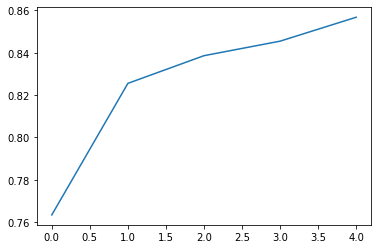

In [41]:
#plotando os dados em um gráfico para melhorar a visualização
plt.plot(historico.history['accuracy'])

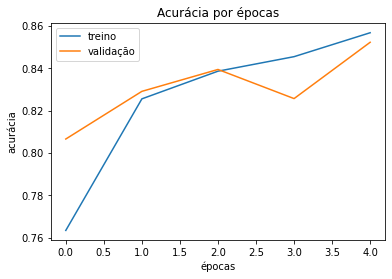

In [46]:
#plotando os dados de acurácia de treino e acurácia de validação para comparar
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

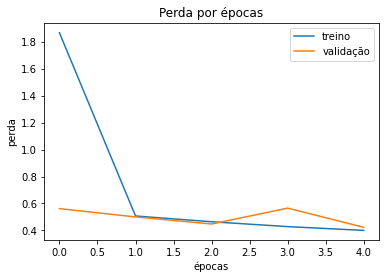

In [47]:
#plotando o gráfico de perda nos dados de treino e validação
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

# Aumentando o número de treinos para verificar se temos mais alguma melhora no algoritimo

In [49]:
# treinaremos 10 vezes o algoritimo
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 17s 11ms/step - loss: 1.7380 - accuracy: 0.7642 - val_loss: 0.5513 - val_accuracy: 0.8213
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.5102 - accuracy: 0.8238 - val_loss: 0.5360 - val_accuracy: 0.8042
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.4538 - accuracy: 0.8396 - val_loss: 0.4482 - val_accuracy: 0.8453
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4227 - accuracy: 0.8479 - val_loss: 0.4193 - val_accuracy: 0.8457
Epoch 5/10
1500/1500 [==============================] - 20s 14ms/step - loss: 0.4017 - accuracy: 0.8545 - val_loss: 0.3929 - val_accuracy: 0.8582
Epoch 6/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3834 - accuracy: 0.8619 - val_loss: 0.4316 - val_accuracy: 0.8444
Epoch 7/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3668 - accuracy: 0.8681 - val_loss: 0.3739 -

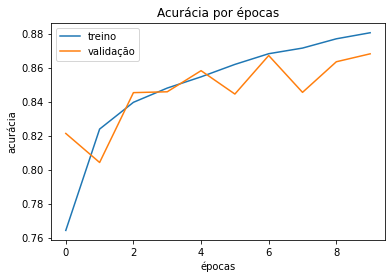

In [50]:
#plotando os dados de acurácia de treino e acurácia de validação para comparar
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

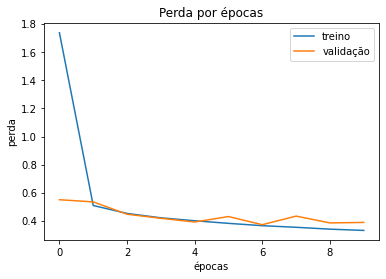

In [51]:
#plotando o gráfico de perda nos dados de treino e validação
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [58]:
#salvando o modelo e carregando em uma variável
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [52]:
# Adicionando uma taxa de dormencia para os neurônios, iremos retringir a absorvição de dados
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 15s 10ms/step - loss: 3.5276 - accuracy: 0.6509 - val_loss: 0.7258 - val_accuracy: 0.7466
Epoch 2/5
1500/1500 [==============================] - 19s 12ms/step - loss: 0.7988 - accuracy: 0.7186 - val_loss: 0.6152 - val_accuracy: 0.7921
Epoch 3/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.7243 - accuracy: 0.7426 - val_loss: 0.5479 - val_accuracy: 0.8021
Epoch 4/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.7042 - accuracy: 0.7532 - val_loss: 0.5900 - val_accuracy: 0.8027
Epoch 5/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.6738 - accuracy: 0.7602 - val_loss: 0.5601 - val_accuracy: 0.8054


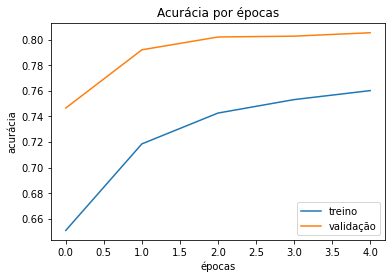

In [55]:
#plotando os dados de acurácia de treino e acurácia de validação para comparar
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

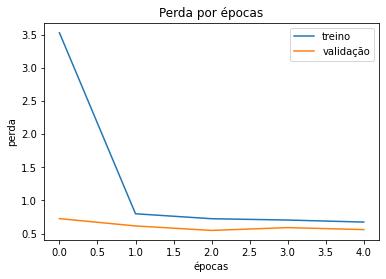

In [56]:
#plotando o gráfico de perda nos dados de treino e validação
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [60]:
#testando o modelo salvo com 10 passagens

testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 4ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 1s 3ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


## Tudo ok, otimizado e salvo o modelo com 10 passagens

# Concluimos que o nosso algoritimo esta se saindo muito bem, tanto para os dados de treino quanto para validação.

## Um bom modelo não pode sofrer de Underfitting nem de Overfitting, por isso precisamos entender estes conceitos e saber identificar suas ocorrências.


# Overfitting =  Ocorre quando, nos dados de treino, o modelo tem um desempenho excelente, porém quando utilizamos os dados de teste/validação o resultado é ruim

# Underfitting = Desempenho do modelo já é ruim no próprio treinamento